# Statistical Analysis of COVID-19 Epidemic

Group Number : 6

Group Member(s) : Eren Gülüm

Student Id = 21627265



# Abstract:

COVID-19, which started recently, is about to become the most dangerous disease in the
world. Due to the virus spreading all over the world from China, a pandemic was declared
about a month ago. The virus, which currently has no vaccine or effective treatment, is
becoming more and more dangerous.

In this project, our aim is to examine the spread of the virus with different methods, to
achieve some results and to better understand the spread mechanism of the virus.
During the project; We will work on datasets containing virus spread areas, spread rate,
mortality rate and other factors.

Our project will basically consist of three different sections:

In the first part, we will try to find the real reasons behind the mortality rates.

In the second part of the project, the full quarantine situation, the semi-quarantine situation
(social distance) and the Free-movement situations will be examined. In these three
different cases, the spread rates of the virus will be determined.

In the third part, the report published by the Italian doctors will be examined. Then, we will try to predict total cases and total deaths of the countries by using different machine learning models

# Project is divided into three different parts, so we created a table of contents for three different sections.

## Table of Content
# Part 1
[Problem](#problem1)   
[Data Understanding](#data_understanding1)   
[Data Preparation](#data_preparation1)   
[Modeling](#modeling1)#There is no modeling section in Part 1

[Evaluation](#evaluation1)   
[References](#references)   

# Part 2
[Problem](#problem2)   
[Data Understanding](#data_understanding2)   
[Data Preparation](#data_preparation2)   
[Modeling](#modeling2)   
[Evaluation](#evaluation2)   
[References](#references)   

# Part 3
[Problem](#problem3)   
[Data Understanding](#data_understanding3)   
[Data Preparation](#data_preparation3)   
[Modeling](#modeling3)   
[Evaluation](#evaluation3)   
[References](#references)   



In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import statsmodels.api as sm
from sklearn.metrics import r2_score
from sklearn.model_selection import RandomizedSearchCV, train_test_split
from sklearn.svm import SVR
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures,StandardScaler
from sklearn.linear_model import LinearRegression

## Problem - 1 <a class="anchor" id="problem1"></a>

In the first part of the implementation, we will examine the spread of the virus in three
completely different countries, using the data we have received so far. (Italy, Turkey,
Germany)
In these countries, which have very different mortality rates, we will try to find the main
causes of death rates (Health Services, Population, Average Age, Social Distance, Quarantine,
etc.)
After this review, we will graph the results we found using the Python library.

In [2]:
germany_data = pd.read_csv("covid19_germany.csv")
italy_data = pd.read_csv("covid19_italy.csv")
turkey_data = pd.read_csv("covid19_turkey.csv")



## Data Understanding - 1<a class="anchor" id="data_understanding1"></a>

In this part i am going to use a lot of different datasets. Daily update of the Turkey, Italy and Germany will be used.Number of hospital beds and ventilators (from wikipedia table) will be used as well.

Dataset of daily Coronavirus update for the countries can be downloaded here: https://ourworldindata.org/coronavirus-data-explorer?yScale=log&zoomToSelection=true&deathsMetric=true&dailyFreq=true&aligned=true&smoothing=7&country=USA+GBR+CAN+BRA+AUS+IND+ESP+DEU+FRA+RUS

There was no csv file related to hospital beds and ventilators, so I converted the table in Wikipedia to CSV format:
https://en.wikipedia.org/wiki/Template:Hospital_beds_by_country#cite_note-BBC_data-26

Population age averages dataset downloaded here: https://worldpopulationreview.com/countries/median-age/

In [3]:
turkey_data.head()

,Country,date,total_cases,new_cases,total_deaths,new_deaths
0,Turkey,2020-03-12,1,1,0,0
1,Turkey,2020-03-13,2,1,0,0
2,Turkey,2020-03-16,18,16,0,0
3,Turkey,2020-03-17,47,29,0,0
4,Turkey,2020-03-18,98,51,0,0


In [4]:
turkey_data.drop(["Country"],axis=1,inplace=True)
#We will take the data after the 250th case
turkey_data = turkey_data[turkey_data['total_cases'] > 250]

turkey_data.index = np.arange(1, len(turkey_data)+1) #İndex 0'ıncı günden başlıyordu bunun yerine 1'den başlattık
turkey_data.head()

,date,total_cases,new_cases,total_deaths,new_deaths
1,2020-03-20,359,168,4,3
2,2020-03-21,670,311,9,5
3,2020-03-22,947,277,21,12
4,2020-03-23,1236,289,30,9
5,2020-03-24,1529,293,37,7


In [5]:
italy_data.drop(["Country"],axis=1,inplace=True)
italy_data = italy_data[italy_data['total_cases'] > 250]

italy_data.index = np.arange(1, len(italy_data)+1) #Index was starting on day 0 but we decided to start from 1
italy_data.head()

,date,total_cases,new_cases,total_deaths,new_deaths
1,2020-02-26,322,93,11,5
2,2020-02-27,400,78,12,1
3,2020-02-28,650,250,17,5
4,2020-02-29,888,238,21,4
5,2020-03-01,1128,240,29,8


In [6]:
germany_data.drop(["Country"],axis=1,inplace=True)
germany_data = germany_data[germany_data['total_cases'] > 250]

germany_data.index = np.arange(1, len(germany_data)+1) 
germany_data.head()


,date,total_cases,new_cases,total_deaths,new_deaths
1,2020-03-05,262,66,0,0
2,2020-03-06,400,138,0,0
3,2020-03-07,684,284,0,0
4,2020-03-08,847,163,0,0
5,2020-03-09,902,55,0,0


# Data Preparation - 1<a class="anchor" id="data_preparation1"></a>
Number of missing values will be checked for dataset of each country
Since correlation isn't very important in this part, we won't use it for now (wil be used for Part3)
We have already dropped some columns till now but since our data isn't too large for now, we don't need more elimination.

In [7]:
print("Number of missing values in Turkey's data:" , turkey_data.isnull().sum().sum()) #So, there is no missing value in the data
print("Number of missing values in Italy's data:" , italy_data.isnull().sum().sum())
print("Number of missing values in Germany's data:" , germany_data.isnull().sum().sum()) 


Number of missing values in Turkey's data: 0
Number of missing values in Italy's data: 0
Number of missing values in Germany's data: 0


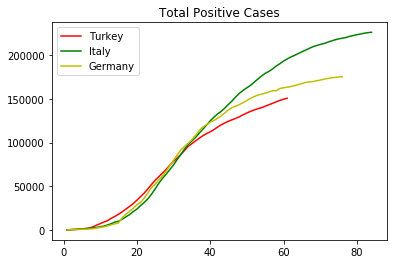

In [8]:
plt.plot(turkey_data.loc[:,"total_cases"],color="r",label="Turkey")
plt.plot(italy_data.loc[:,"total_cases"],color="g",label="Italy")
plt.plot(germany_data.loc[:,"total_cases"],color="y",label="Germany")
plt.title("Total Positive Cases")
plt.legend(loc="best")
plt.show()

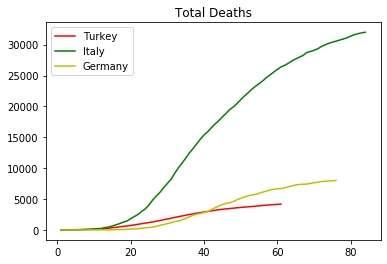

In [9]:
plt.plot(turkey_data.loc[:,"total_deaths"],color="r",label="Turkey")
plt.plot(italy_data.loc[:,"total_deaths"],color="g",label="Italy")
plt.plot(germany_data.loc[:,"total_deaths"],color="y",label="Germany")
plt.title("Total Deaths")
plt.legend(loc="best")
plt.show()


## Although there is not a significant difference in the number of cases, we see that the death numbers of Italy are very high

Especially since the 20th day after the virus began to spread, the death toll is rising very sharply in Italy (unlike Germany and Turkey)

So what could be the reasons for this?

According to the scientists' explanations; Factors such as the number of intensive care beds, ages of patients, past diseases, respiratory equipment and population of the countries have a first-degree effect on the increase in the number of deaths.

To verify this information, let's examine the number of intensive care beds and ventilators beds of these three countries and then their average age.



In [10]:
hospitalData = pd.read_csv("beds_ventilators.csv")
hospitalData.head()

,Country/territory,Continent,"ICU-CCB beds/100,000 inhabitants",Ventilators
0,Japan,Asia,7.3,32586
1,South Korea,Asia,10.6,9795
2,Russia,Europe,8.3,40000
3,Germany,Europe,33.9,25000
4,Austria,Europe,21.8,2500


In [11]:
countries = ['Turkey', 'Italy', 'Germany']
num_ventilators = []
num_ventilators.append(int(hospitalData[hospitalData["Country/territory"]=="Turkey"]["Ventilators"].values))
num_ventilators.append(int(hospitalData[hospitalData["Country/territory"]=="Italy"]["Ventilators"].values))
num_ventilators.append(int(hospitalData[hospitalData["Country/territory"]=="Germany"]["Ventilators"].values))
num_ventilators

[17000, 5324, 25000]

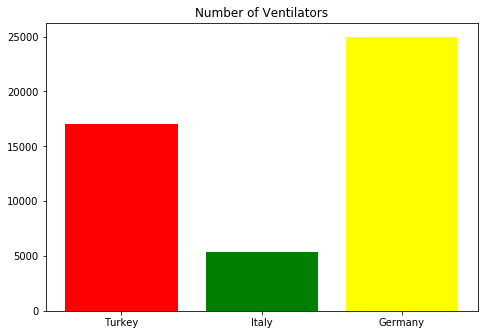

In [12]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(countries,num_ventilators,color=["Red","Green","Yellow"])
plt.title("Number of Ventilators")
plt.show()

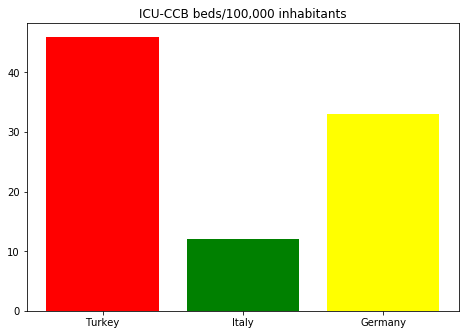

In [13]:
icu_beds = []
icu_beds.append(int(hospitalData[hospitalData["Country/territory"]=="Turkey"]["ICU-CCB beds/100,000 inhabitants"].values))
icu_beds.append(int(hospitalData[hospitalData["Country/territory"]=="Italy"]["ICU-CCB beds/100,000 inhabitants"].values))
icu_beds.append(int(hospitalData[hospitalData["Country/territory"]=="Germany"]["ICU-CCB beds/100,000 inhabitants"].values))

fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.bar(countries,icu_beds,color=["Red","Green","Yellow"])
plt.title("ICU-CCB beds/100,000 inhabitants")
plt.show()

In both charts, we see that Italy is far behind. Therefore, we can estimate that hospitals and ventilators are full after a certain number of positive cases (day 20).

Therefore, we see that the deaths increased very rapidly, differentiating from the other two countries from the 20th day.
(After the 20th day, there are not enough ventilators and beds for treatment in Italy)


Let's examine the average age of the population:
The dataset was downloaded here: https://worldpopulationreview.com/countries/median-age/

In [14]:
#Average Ages
average_age = pd.read_csv("average_ages.csv") # https://worldpopulationreview.com/countries/median-age/
average_age.head()

#Both Germany and Italy is in Top 5 (Oldest)

,Place,Median,Median Male,Median Female
0,Monaco,53.1,51.7,54.5
1,Japan,47.3,46.0,48.7
2,Germany,47.1,46.0,48.2
3,Saint Pierre and Miquelon,46.5,46.0,47.0
4,Italy,45.5,44.4,46.5


In [15]:
menAvAgeList = []
menAvAgeList.append(float(average_age[average_age["Place"]=="Turkey"]["Median Male"].values))
menAvAgeList.append(float(average_age[average_age["Place"]=="Italy"]["Median Male"].values))
menAvAgeList.append(float(average_age[average_age["Place"]=="Germany"]["Median Male"].values))
print(menAvAgeList)

womenAvAgeList = []
womenAvAgeList.append(float(average_age[average_age["Place"]=="Turkey"]["Median Female"].values))
womenAvAgeList.append(float(average_age[average_age["Place"]=="Italy"]["Median Female"].values))
womenAvAgeList.append(float(average_age[average_age["Place"]=="Germany"]["Median Female"].values))

print(womenAvAgeList)

[30.5, 44.4, 46.0]
[31.4, 46.5, 48.2]


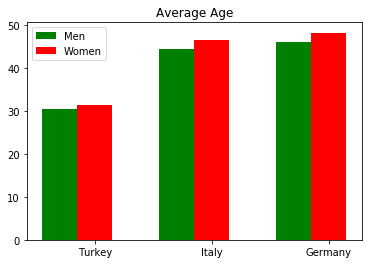

In [16]:
width =0.3
plt.bar(np.arange(len(menAvAgeList)), menAvAgeList, width=width,color="g",label='Men')
plt.bar(np.arange(len(womenAvAgeList))+ width, womenAvAgeList, width=width,color="r",label='Women')
plt.xticks(np.arange(len(womenAvAgeList))+width, ('Turkey', 'Italy', 'Germany'))
plt.title("Average Age")
plt.legend(loc="best")
plt.show()

## Evaluation 1 <a class="anchor" id="evaluation1"></a>

When we examine these three different factors above, we can understand why so many people died in Italy.

When we check the case increase and death increase graphs, we see that the case increases of all three countries are similar.
However, the number of deaths started to increase "incredibly" in Italy from the 20th day.

One of the main reason is that Italy has much less respiratory equipment(ventilators) than the other two countries. Also, if we check the number of intensive care beds per 100,000 people, we can see that Italy has the lowest number among this three country.

We know that people with heavy illness are treated by ventilators and intensive care units. If there is a lack of breathing apparatus&ventilators, especially elderly patients die.

We can better understand this situation by examining the Total Deaths chart.
 
In Italy, where the population is old and there are about 25,000 cases on the 18th day, the lack of respiratory equipment begins. Then the death rate begins to increase incredibly.

Since there are no empty suitable ventilators  available , the majority of patients with severe illness begin to die.




From the 40th day, the number of deaths begins to separate from each other in Turkey and Germany.
Although it is not like in Italy, the death toll is rising in Germany than in Turkey.

Considering that the disease is more fatal and prolonged in the elderly population, we can see this as normal.
Germany's population average age is much older than Turkey. Therefore, we can estimate that patients are recovering later.

Therefore, even though the number of respirators is high, respirators appear to be full, as the elderly need treatment for a longer period of time.

Considering that Germany has an elderly population, we can see this increase in mortality as normal. Although the elderly population in Germany is similar to Italy, there has been much less death than Italy due to the number of intensive care beds and its serious advantage in respiratory equipment.

 Turkey has a young population and health system prepared for such a situation. So Turkey, continues to struggle with less losses compared to these two countries.

## PART 2 - EVALUTION OF DIFFERENT QUARANTINE SITUATIONS:

## Problem -2 <a class="anchor" id="problem2"></a>

The full quarantine situation, the semi-quarantine situation (social distance) and the
Free-movement situations will be examined. In these three different cases, the spread rates
of the virus will be determined.

For this part, the case increase of CoVID-19 before and after quarantine in Italy will be
examined separately. (Dataset to be used: specified in Data 2.1)
Then, the situation of Germany, which implements partial quarantine (social distance), will
be examined.

As a result, we will make an assessment of how these different quarantine applications works. We will try to predict number of total cases if there won't be any Quarantine or Social Distance.
We will use different Regression models for the prediction

## Data Understanding - 2<a class="anchor" id="data_understanding2"></a>

We will use the same datasets in the first section (Part-1). We will use tables to better understand the data. Since our goal is to see the effects of Full Scale Quarantine (Curfew) and Social Distance Rules, we will break the graphs into pieces

In [17]:
it_data = italy_data.loc[:,"total_cases"]

quarantineStart = italy_data[italy_data["date"]=="2020-03-21"]["total_cases"].values[0]
quarantine14 = italy_data[italy_data["date"]=="2020-04-04"]["total_cases"].values[0]
adjusted_dates = np.array([i+1 for i in range(len(italy_data))]).reshape(-1, 1)

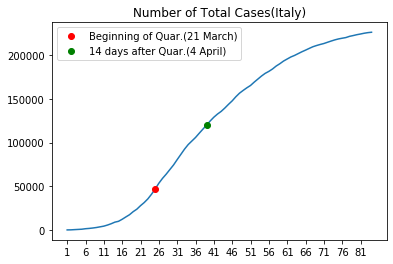

In [18]:
plt.plot(adjusted_dates,it_data)
plt.xticks(np.arange(min(adjusted_dates), max(adjusted_dates)+1, 5))
plt.plot(25,quarantineStart,'ro',color="r",label="Beginning of Quar.(21 March)") 
plt.plot(39,quarantine14,'ro',color ="g",label="14 days after Quar.(4 April)") 
plt.title("Number of Total Cases(Italy)")

plt.legend(loc="best")

#On 21 March, Conte announced a further enlargement of the lockdown, by shutting down all non-necessary businesses and industries

The incubation period of the coronavirus is 14 days. In other words, it is necessary to wait at least 14 days to examine the result of a decision.
For example, a person infected with the virus on March 20 (just before quarantine) can get sick on the 14th day, so he can start getting sick on April 3.
Therefore, in order to examine the effect of quarantine on the rate of increase of cases, we should examine the data from the 14th day, not the day the quarantine started.
In other words, the effects of the comprehensive curfew that started in Italy on 21 March should be examined from 4 April.


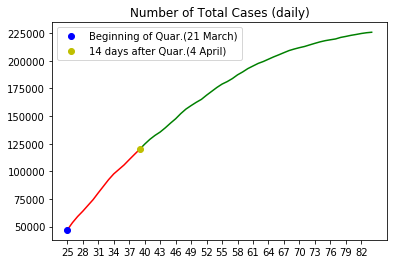

In [19]:
quarantine_days = [i for i in adjusted_dates if i>=25]

quarantine_days14 = [i for i in adjusted_dates if i>=25 and i<=39]
quarantine_days_after14 = [i for i in adjusted_dates if i>=39]

plt.plot(quarantine_days14,italy_data[(italy_data.date >= "2020-03-21") & (italy_data.date <= "2020-04-04")]["total_cases"].values,color="r")
plt.plot(quarantine_days_after14,italy_data[italy_data["date"]>="2020-04-04"]["total_cases"].values,color="g")
plt.plot(25,quarantineStart,'ro',color="b",label="Beginning of Quar.(21 March)") 
plt.plot(39,quarantine14,'ro',color ="y",label="14 days after Quar.(4 April)") 
plt.xticks(np.arange(min(quarantine_days), max(quarantine_days)+1, 3))
plt.title("Number of Total Cases (daily)")
plt.legend(loc="best")
plt.show()

As can be seen in the graph, 14 days after the general-scale quarantine (curfew), the chart slows down considerably. Using different machine learning algorithms below, we will try to estimate what would be the estimated total case value if curfew was not declared.

But first, let's examine the data of Germany, which applies social distance rules, instead of nationwide-curfew(Full Scale Quarantine) .

# Another Solution to Avoid Spread of the Virus: Social Distance (Germany)



There was no general curfew in Germany.Germany choose the follow Social Distance instead of general curfew.

Activities involving many people were canceled, and collective navigation was prohibited.More detailed rules of the Germany-type Social Distance can be find:
22 March: https://www.bbc.com/news/world-europe-51999080

In [20]:
socDistBegin = germany_data[germany_data["date"]=="2020-03-22"]["total_cases"].values[0]
socDist14 = germany_data[germany_data["date"]=="2020-04-05"]["total_cases"].values[0]


Text(0.5, 1.0, 'Number of Total Cases(Germany)')

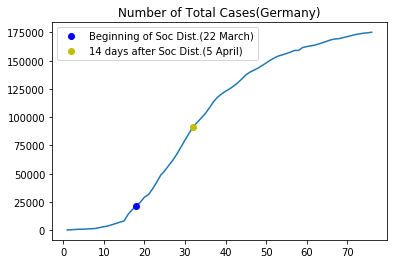

In [21]:
plt.plot(np.array([i+1 for i in range(len(germany_data))]),germany_data.loc[:,"total_cases"].values)
plt.plot(18,socDistBegin,'ro',color="b",label="Beginning of Soc Dist.(22 March)") 
plt.plot(32,socDist14,'ro',color ="y",label="14 days after Soc Dist.(5 April)") 
plt.legend(loc="best")
plt.title("Number of Total Cases(Germany)")

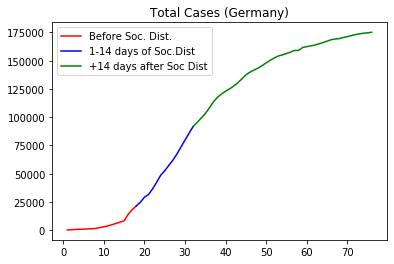

In [22]:

days_before_socDist = np.array([i for i in range(len(germany_data)) if i<=18 and i != 0 ])
days_btw_socDist_14 = np.array([i for i in range(len(germany_data)) if i<=32 and i>=18])
days_after_socDist_14 = np.array([i for i in range(len(germany_data)+1) if i>=32])

#Visualization of the situation
plt.plot(days_before_socDist,germany_data[germany_data["date"]<="2020-03-22"]["total_cases"].values,color="r",label="Before Soc. Dist.")
plt.plot(days_btw_socDist_14,germany_data[(germany_data.date >= "2020-03-22") & (germany_data.date <="2020-04-05")]["total_cases"].values,color="b",label="1-14 days of Soc.Dist")
plt.plot(days_after_socDist_14,germany_data[germany_data["date"]>="2020-04-05"]["total_cases"].values,color="g",label="+14 days after Soc Dist")
plt.title("Total Cases (Germany)")
plt.legend(loc="best")
plt.show()

## Data Preparation-2<a class="anchor" id="data_preparation2"></a>

Here, we have not made any changes to the data yet, since we used the same data in the first part (Part 1). In the modeling section, we will use the data by dividing it into different sets of tests and trains.

In the third part (Part 3) we worked on a big data source. So you can see most of the work related to the data preparation section there. In the third part, we deleted many columns&features that would not fit our model . Then we checked the correlation status again and deleted other columns as well. Finally, we deleted all rows that contain NaN values.

So, you will see more detailed procedures on data preparation in the third section (Part 3). In the first two episodes, the Data Preparation phase was very short, as the data was not very large.


# Modeling - 2<a class="anchor" id="modeling2"></a>: 

## Now we are going to use some machine learning algorithms to predict total cases if there won't be any general Quarantine(curfew) in Italy or Social Distance in Germany

If the full-quarantine&curfew or Social Distance Rules was not declared, what would be the number of cases? Thats the our aim to predict these numbers by using some Regression Models

Italy: 
In the first 14 days of the quarantine, we can see that the curve has increased more linearly. After 14 days, the rate of increase in cases is decreasing. Lets use Linear Regression to predict number of total cases if there won't be any curfew.

We will train the model by giving the total case data of the first 39 days(39th day is the 14th day of the beginning of curfew)
As we mentioned above, incubation time of this virus is 14 days.It means, The real effects of the curfew will appear from day 14. Thats why we are looking the 14 days after the curfew. (See above for more info about incubation time).

After the training, we wil give the rest of the days to predict total case if there won't be a curfew in Italy:

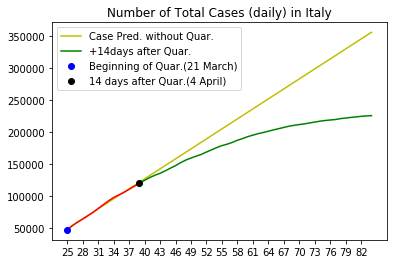

In [23]:
first14cases = italy_data[(italy_data.date >= "2020-03-21") & (italy_data.date <= "2020-04-04")]["total_cases"].values
lin_reg3 = LinearRegression()
lin_reg3.fit([i for i in quarantine_days if i<40],first14cases)
pred = lin_reg3.predict([i for i in adjusted_dates if i>=25])


plt.plot(quarantine_days,pred,color="y",label="Case Pred. without Quar.")
plt.plot(quarantine_days14,italy_data[(italy_data.date >= "2020-03-21") & (italy_data.date <= "2020-04-04")]["total_cases"].values,color="r")
plt.plot(quarantine_days_after14,italy_data[italy_data["date"]>="2020-04-04"]["total_cases"].values,color="g",label="+14days after Quar.")
plt.plot(25,quarantineStart,'ro',color="blue",label="Beginning of Quar.(21 March)") 
plt.plot(39,quarantine14,'ro',color ="black",label="14 days after Quar.(4 April)") 
plt.title("Number of Total Cases (daily) in Italy")
plt.xticks(np.arange(min(quarantine_days), max(quarantine_days)+1, 3))

plt.legend(loc="best")

If it was not declared quarantine, the rate of increase in the case would continue linearly (as between days 25 and 41).

If it continued to increase in this way, the number of cases would be +350,000 on the 82nd day. However, with the effect of the quarantine, we can see that the curve has started to bend seriously since April 4.


One model won't be enough so we are going to use one more Regression Model: SVR

I coded SVR as a function so we can use it again during the prediction of the Germany's total cases
In the function, we will use three different kernel of the SVR.
All results will be plotted

# SVR Model:



In [24]:
def svr_case_prediction(X,Y,prediction_category,testsize):
    X_train_case, X_test_case, y_train_case, y_test_case = train_test_split(X, Y, test_size=testsize,random_state=21,shuffle=False)
    sc = StandardScaler()
    sc2 = StandardScaler()
    x_train_scaled = sc2.fit_transform(X_train_case)
    y_train_scaled = sc.fit_transform(y_train_case)
    x_test_scaled = sc2.fit_transform(X_test_case)
    y_test_scaled = sc.fit_transform(y_test_case)

    svr_rbf = SVR(kernel = 'rbf')
    svr_rbf.fit(x_train_scaled,y_train_scaled.ravel())

    svr_lin = SVR(kernel = 'linear')
    svr_lin.fit(x_train_scaled,y_train_scaled.ravel())

    svr_poly = SVR(kernel = 'poly')
    svr_poly.fit(x_train_scaled,y_train_scaled.ravel())

    plt.plot(sc2.inverse_transform(x_test_scaled),sc.inverse_transform(y_test_scaled),color='black',label="Real Total Case after Quar/SocDis")
    plt.plot(sc2.inverse_transform(x_test_scaled),sc.inverse_transform(svr_rbf.predict(x_test_scaled)), color = 'blue',label="w/o Quar/SocDist (RBF)")
    plt.plot(sc2.inverse_transform(x_test_scaled),sc.inverse_transform(svr_lin.predict(x_test_scaled)), color = 'yellow', label="w/o Quar/SocDist (Linear)")
    plt.plot(sc2.inverse_transform(x_test_scaled),sc.inverse_transform(svr_poly.predict(x_test_scaled)), color = 'red', label="w/o Quar/SocDist (Poly)")
    plt.legend(loc="best")
    plt.title("SVR Prediction +14 days After Quar/SocialDist ("+prediction_category +")")
    plt.show()




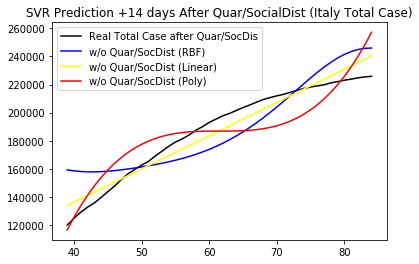

In [25]:
all_days_italy = np.array([i+1 for i in range(len(italy_data["total_cases"]))])

svr_case_prediction(all_days_italy.reshape(-1, 1),italy_data["total_cases"].values.reshape(-1, 1),"Italy Total Case",0.54)
# Test_size= 0.54 means it will take 1-39th days as train data (days between the beginning of curfew and 14 days after it) and rest will be test data



# Germany
Now it is turn for Germany, what would be the number of cases in Germany if the Social Distance Rules was not declared?

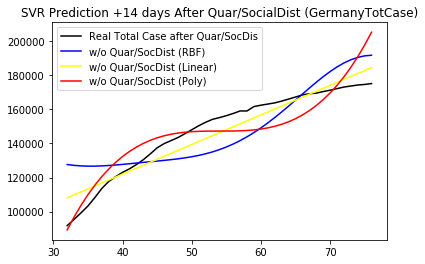

In [26]:
all_days_germany = np.array([i+1 for i in range(len(germany_data["total_cases"]))])
svr_case_prediction(all_days_germany.reshape(-1, 1),germany_data["total_cases"].values.reshape(-1, 1),"GermanyTotCase",0.58)
# Test_size= 0.58 means it will take 1-32th days as train data (days between the beginning of Social Distance in Germany and 14 days after it) and rest will be test data

## Evaluation-2 <a class="anchor" id="evaluation2"></a>

As we mentioned above, the actual start date of the effect of the curfew is 14 days after the announcement of the ban. Because this virus can remain in incubation for 14 days. So, to discuss the effects of the curfew, we have to look after 14 days.

The aim here is to answer the question of what would be the number of cases if quarantine was not declared.
So we have no chance to measure the accuracy of the models.

Although the models did not give very good results, we saw that in all three different models for both countr, the number of cases would have been much higher if it was not a curfew&Social Distance.

We can understand that this is true from the following two graphs:

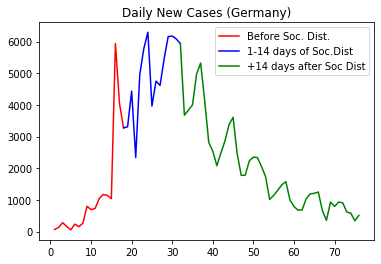

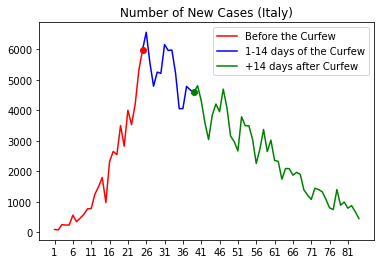

In [27]:
plt.plot(days_before_socDist,germany_data[germany_data["date"]<="2020-03-22"]["new_cases"].values,color="r",label="Before Soc. Dist.")
plt.plot(days_btw_socDist_14,germany_data[(germany_data.date >= "2020-03-22") & (germany_data.date <= "2020-04-05")]["new_cases"].values,color="b",label="1-14 days of Soc.Dist")
plt.plot(days_after_socDist_14,germany_data[germany_data["date"]>="2020-04-05"]["new_cases"].values,color="g",label="+14 days after Soc Dist")
plt.title("Daily New Cases (Germany)")
plt.legend(loc="best")
plt.show()

plt.plot([i for i in adjusted_dates if i<=25],italy_data[italy_data["date"]<="2020-03-21"]["new_cases"].values,color="r",label="Before the Curfew")
plt.plot(quarantine_days14,italy_data[(italy_data.date >= "2020-03-21") & (italy_data.date <= "2020-04-04")]["new_cases"].values,color="b",label="1-14 days of the Curfew")
plt.plot(quarantine_days_after14,italy_data[italy_data["date"]>="2020-04-04"]["new_cases"].values,color="g",label="+14 days after Curfew")
plt.plot(25,italy_data[(italy_data.date== "2020-03-21")]["new_cases"].values[0], 'ro',color="r") 
plt.plot(39,italy_data[(italy_data.date== "2020-04-04")]["new_cases"].values[0],'ro',color ="g") 
plt.xticks(np.arange(min(adjusted_dates), max(adjusted_dates)+1, 5))
plt.title("Number of New Cases (Italy)")
plt.legend(loc="best")
plt.show()

In both countries, after the decisions taken, the number of new cases starts to decrease significantly

# Part - 3


 ## Problem-3 <a class="anchor" id="problem3"></a>
 
 We will examine the data of COVID-19 patients who died in Italy.So we will try to find what are the characteristics of 31,096 SARS-CoV-2 patients dying in Italy.
 
 After that, by using this information, we will try to predict total case and total death counts of the countries by using some machine learning algorithms.

## Data Understanding-3<a class="anchor" id="data_understanding3"></a>


The data below is from the report prepared by Italian doctors. Data cannot be accessed due to patient privacy.
But I have converted the statistics in pdf into csv and will visualize it here.
Report describes characteristics of 31,096 SARS-CoV-2 patients dying in Italy: https://www.epicentro.iss.it/en/coronavirus/sars-cov-2-analysis-of-deaths


Then we will work on a large dataset and estimate the total number of cases and deaths of some countries.In this dataset, there are 32 columns and more than 21.000 rows. It shows a lot different features of the all countries around the world.Since the dataset is too big we will apply some data preparation methods on it.
https://ourworldindata.org/coronavirus-data-explorer?yScale=log&zoomToSelection=true&deathsMetric=true&dailyFreq=true&aligned=true&smoothing=7&country=USA+GBR+CAN+BRA+AUS+IND+ESP+DEU+FRA+RUS

In [28]:
death_age_group = pd.read_csv("death_age_group.csv")
death_age_group.head(len(death_age_group))

,Age Interval,women,men,all
0,0-9,3,1,4
1,10-19,0,0,0
2,20-29,3,10,13
3,30-39,20,41,61
4,40-49,70,199,269
5,50-59,250,852,1102
6,60-69,762,2463,3225
7,70-79,2526,5940,8466
8,80-89,5527,7202,12729
9,90+,3454,1773,5227


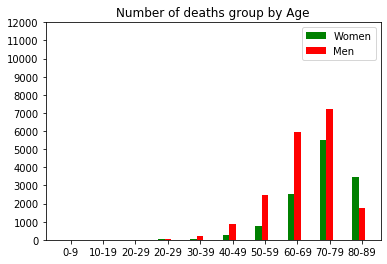

In [29]:
width =0.2
plt.bar(np.arange(len(death_age_group["women"].values)), death_age_group["women"].values, width=width,color="g",label='Women')
plt.bar(np.arange(len(death_age_group["men"].values))+ width, death_age_group["men"].values, width=width,color="r",label='Men')
plt.xticks(np.arange(len(death_age_group["men"].values))+width, ('0-9', '10-19', '20-29','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90+'))
plt.yticks(np.arange(0, 13000, step=1000))
plt.title("Number of deaths group by Age")
plt.legend(loc="best")
plt.show()

In [30]:
report_diseases = pd.read_csv("diseases.csv")
report_diseases.head()

,Diseases,Number
0,Ischemic heart disease,856
1,Atrial Fibrillation,681
2,Heart failure,490
3,Stroke,310
4,Hypertension,2071


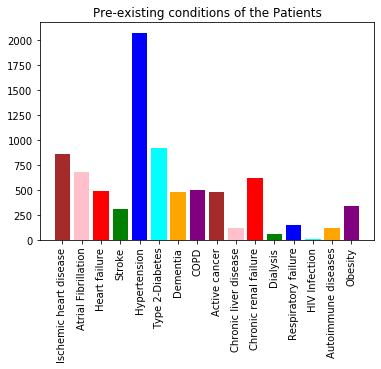

In [31]:
bar_colors = ['brown','pink', 'red', 'green', 'blue','cyan','orange','purple']
plt.bar(report_diseases["Diseases"].values,report_diseases["Number"],color = bar_colors)
plt.xticks(rotation=90)
plt.title("Pre-existing conditions of the Patients")
plt.show()

In [32]:
report_symptoms = pd.read_csv("symptoms.csv")
report_symptoms.info

<bound method DataFrame.info of      Symptoms  Percentage
0       Fever          76
1    Dyspnoea          74
2       Cough          39
3    Diarrhea           6
4  Hemoptysis           1>

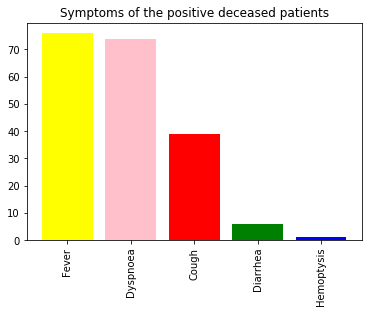

In [33]:
bar_colors = ['yellow','pink', 'red', 'green', 'blue']
plt.bar(report_symptoms["Symptoms"].values,report_symptoms["Percentage"],color=bar_colors)
plt.xticks(rotation=90)
plt.title("Symptoms of the positive deceased patients")
plt.show()


As we understand from the data in the PDF, the mortality rate is much more in the elderly and those who have chronic conditions (especially diabetes and Hypertension). Most common symptoms are Fever and Dysphonea

In [34]:
covid_data = pd.read_excel("covidGeneralData.xlsx")
covid_data.head()

,iso_code,location,date,total_cases,new_cases,total_deaths,new_deaths,total_cases_per_million,new_cases_per_million,total_deaths_per_million,...,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cvd_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_100k
0,ABW,Aruba,2020-03-13,2,2,0,0,18.733,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
1,ABW,Aruba,2020-03-20,4,2,0,0,37.465,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
2,ABW,Aruba,2020-03-24,12,8,0,0,112.395,74.930,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
3,ABW,Aruba,2020-03-25,17,5,0,0,159.227,46.831,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN
4,ABW,Aruba,2020-03-26,19,2,0,0,177.959,18.733,0.0,...,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN


# Data Preparation-3<a class="anchor" id="data_preparation3"></a>

We will now work on a large dataset, so we will try to use only useful data and shrink the dataset.
Our goal here is to find the total number of cases and the total number of deaths for some of the countries of the world.
In short, we will find how many cases and total deaths occurred in some countries on 20 May 2020.
So we will only receive data from all countries on 20 May 2020.

After that, we will delete some features that don't affect the number of cases and deaths (iso_code, stringency_index, extreme_poverty, gdp_per_capita etc ...)

After examining the above graphs, we see that some columns are very important to us. ( "Total_cases", "total_deaths", "hospital_beds_per_100k", "diabetes_prevalen by", "aged_65_old is", "is aged_70_old")

Therefore, we will delete the lines containing NaN value in any of these properties.

Finally, we will look at the correlation table of the columns we have and delete some of the high correlation columns.

In [35]:
#1-) We will only use data from all countries on 20 May 2020.
covid_data = covid_data[covid_data["date"]=="2020-05-20"]
covid_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 210 entries, 58 to 19220
Data columns (total 32 columns):
iso_code                           210 non-null object
location                           210 non-null object
date                               210 non-null object
total_cases                        210 non-null int64
new_cases                          210 non-null int64
total_deaths                       210 non-null int64
new_deaths                         210 non-null int64
total_cases_per_million            210 non-null float64
new_cases_per_million              210 non-null float64
total_deaths_per_million           210 non-null float64
new_deaths_per_million             210 non-null float64
total_tests                        70 non-null float64
new_tests                          65 non-null float64
total_tests_per_thousand           70 non-null float64
new_tests_per_thousand             65 non-null float64
new_tests_smoothed                 71 non-null float64
new_tests_sm

In [36]:
#Alttaki kümede NaN olan ülkeleri drop ediyor.
#These data are directly related to the spread of the disease or mortality rates. So in these columns we will delete the rows with the value NaN.
covid_data.dropna(subset = ["total_cases","total_deaths","hospital_beds_per_100k","diabetes_prevalence","aged_65_older","aged_70_older"],inplace=True)

We throw out the unnecessary columns. We don't need these columns. There is no scientific data on their direct influence on the epidemic.

In [37]:
covid_data.drop(["iso_code","stringency_index","new_tests_smoothed_per_thousand","new_tests_per_thousand","female_smokers","male_smokers","total_cases_per_million","total_tests","new_tests","new_cases_per_million","new_deaths_per_million","total_deaths_per_million","extreme_poverty","gdp_per_capita","iso_code","tests_units","total_tests_per_thousand","handwashing_facilities","new_tests_smoothed"],axis=1,inplace=True)
covid_data = covid_data.reset_index()
del covid_data["index"]
del covid_data["date"] # Since all data from = 2020-05-20, we don't need this column


In [38]:
covid_data.corr()

,total_cases,new_cases,total_deaths,new_deaths,population,population_density,median_age,aged_65_older,aged_70_older,cvd_death_rate,diabetes_prevalence,hospital_beds_per_100k
total_cases,1.000000,0.982295,0.992584,0.982576,0.935218,-0.021500,0.053625,0.053989,0.050144,-0.058250,0.030122,0.008323
new_cases,0.982295,1.000000,0.969287,0.987465,0.946503,-0.023229,0.023994,0.010836,0.004981,-0.036359,0.040249,-0.008207
total_deaths,0.992584,0.969287,1.000000,0.979466,0.929223,-0.024857,0.069854,0.080072,0.077991,-0.082313,0.009917,0.004769
new_deaths,0.982576,0.987465,0.979466,1.000000,0.919088,-0.028066,0.040431,0.040904,0.035567,-0.066815,0.026856,-0.013655
population,0.935218,0.946503,0.929223,0.919088,1.000000,-0.014522,0.003789,-0.008665,-0.015966,-0.009242,0.029792,-0.015633
population_density,-0.021500,-0.023229,-0.024857,-0.028066,-0.014522,1.000000,0.133807,0.061999,0.032303,-0.160673,0.149892,-0.000359
median_age,0.053625,0.023994,0.069854,0.040431,0.003789,0.133807,1.000000,0.910433,0.897229,-0.322522,0.133892,0.658525
aged_65_older,0.053989,0.010836,0.080072,0.040904,-0.008665,0.061999,0.910433,1.000000,0.994511,-0.338094,-0.113970,0.647984
aged_70_older,0.050144,0.004981,0.077991,0.035567,-0.015966,0.032303,0.897229,0.994511,1.000000,-0.328632,-0.141414,0.650961
cvd_death_rate,-0.058250,-0.036359,-0.082313,-0.066815,-0.009242,-0.160673,-0.322522,-0.338094,-0.328632,1.000000,-0.006484,0.017972


In [39]:
#Korelasyon incelemesinin ardından silinecek kolonlar
del covid_data["new_cases"]
del covid_data["new_deaths"]

covid_data.corr()

# total_cases ve total_deaths, makine öğrenmesi sonucunda tahmin edileceği için bu iki kolon da silinmeyecek

,total_cases,total_deaths,population,population_density,median_age,aged_65_older,aged_70_older,cvd_death_rate,diabetes_prevalence,hospital_beds_per_100k
total_cases,1.000000,0.992584,0.935218,-0.021500,0.053625,0.053989,0.050144,-0.058250,0.030122,0.008323
total_deaths,0.992584,1.000000,0.929223,-0.024857,0.069854,0.080072,0.077991,-0.082313,0.009917,0.004769
population,0.935218,0.929223,1.000000,-0.014522,0.003789,-0.008665,-0.015966,-0.009242,0.029792,-0.015633
population_density,-0.021500,-0.024857,-0.014522,1.000000,0.133807,0.061999,0.032303,-0.160673,0.149892,-0.000359
median_age,0.053625,0.069854,0.003789,0.133807,1.000000,0.910433,0.897229,-0.322522,0.133892,0.658525
aged_65_older,0.053989,0.080072,-0.008665,0.061999,0.910433,1.000000,0.994511,-0.338094,-0.113970,0.647984
aged_70_older,0.050144,0.077991,-0.015966,0.032303,0.897229,0.994511,1.000000,-0.328632,-0.141414,0.650961
cvd_death_rate,-0.058250,-0.082313,-0.009242,-0.160673,-0.322522,-0.338094,-0.328632,1.000000,-0.006484,0.017972
diabetes_prevalence,0.030122,0.009917,0.029792,0.149892,0.133892,-0.113970,-0.141414,-0.006484,1.000000,-0.057050
hospital_beds_per_100k,0.008323,0.004769,-0.015633,-0.000359,0.658525,0.647984,0.650961,0.017972,-0.057050,1.000000


## Modeling-3<a class="anchor" id="modeling3"></a>

In this part we will try to predict number of total cases and total deaths of the random countries (on 20 May 2020)
We're going to use different Regression models (Linear Regresssion,Polynomial Regression and SVR with three different kernel)

I code the models as functions, so we can use them again and again without any code re-write.


In [40]:
def linear_prediction(X,Y, prediction_category):
    X_train_case, X_test_case, y_train_case, y_test_case = train_test_split(X, Y, test_size=0.33,random_state=21)
    #doğrusal model oluşturma
    lin_reg = LinearRegression()
    lin_reg.fit(X_train_case,y_train_case)
    print("Linear R2 value("+prediction_category+"):",r2_score(y_test_case, lin_reg.predict((X_test_case))))
    # Gorsellestirme
    plt.plot(y_test_case,color='red',label="Real "+prediction_category)
    plt.plot(lin_reg.predict(X_test_case), color = 'blue',label="Predicted "+prediction_category)
    plt.title("Linear Prediction("+prediction_category +")")
    plt.legend(loc="best")
    plt.show()



In [41]:
from sklearn.pipeline import make_pipeline

def polyReg_prediction(X,Y,deg,prediction_category):
    x_training_set, x_test_set, y_training_set, y_test_set = train_test_split(X,Y,test_size=0.10, random_state=21)
    model = make_pipeline(PolynomialFeatures(deg), LinearRegression())
    model.fit(x_training_set,y_training_set)
    pred = model.predict(x_test_set)
    print("Poly. Reg R2 value:",r2_score(y_test_set, pred))

In this section, we will try to predict using Support Vector Regression. We need to normalize the data to use SVR

In [42]:
def svr_prediction(X,Y,prediction_category):
    X_train_case, X_test_case, y_train_case, y_test_case = train_test_split(X, Y, test_size=0.33,random_state=21)
    #Normalization&Standardization across instances should be done after splitting the data between training and test set(note from bbm)
    sc = StandardScaler()
    x_train_scaled = sc.fit_transform(X_train_case)
    y_train_scaled = sc.fit_transform(y_train_case)
    x_test_scaled = sc.fit_transform(X_test_case)
    y_test_scaled = sc.fit_transform(y_test_case)

    svr_rbf = SVR(kernel = 'rbf')
    svr_rbf.fit(x_train_scaled,y_train_scaled.ravel())
    print("SVR(Rbf kernel) R2 value:",r2_score(y_test_scaled, svr_rbf.predict(x_test_scaled)))

    svr_lin = SVR(kernel = 'linear')
    svr_lin.fit(x_train_scaled,y_train_scaled.ravel())
    print("SVR(Linear kernel) R2 value:",r2_score(y_test_scaled, svr_lin.predict(x_test_scaled)))

    svr_poly = SVR(kernel = 'poly')
    svr_poly.fit(x_train_scaled,y_train_scaled.ravel())
    print("SVR(Poly kernel) R2 value:",r2_score(y_test_scaled, svr_poly.predict(x_test_scaled)))


    plt.plot(y_test_scaled,color='black',label="Real Values")
    plt.plot(svr_rbf.predict(x_test_scaled), color = 'blue',label=prediction_category +" pred. (RBF)")
    plt.plot(svr_lin.predict(x_test_scaled), color = 'yellow',label=prediction_category+ " pred. (Linear)")
    plt.plot(svr_poly.predict(x_test_scaled), color = 'red',label=prediction_category + " pred. (Poly)")
    plt.legend(loc="best")
    plt.title("SVR Prediction("+prediction_category +")")
    plt.show()
    


## Evaluation-3<a class="anchor" id="evaluation3"></a>
Since we use different models to predict both total case and total death, we will evaluate the results at their own section.

# Total Case Prediction

SVR, Linear Regression and Polynomial Regression models will be used in this section

In [43]:
x_case = covid_data.iloc[:,2:] # All columns except total_case
y_case = covid_data.iloc[:,1:2] #Total Case column

#NumPY dizi (array) dönüşümü
X_case = x_case.values
Y_case = y_case.values

SVR(Rbf kernel) R2 value: 0.0830043245586437
SVR(Linear kernel) R2 value: 0.9853637330658226
SVR(Poly kernel) R2 value: 0.8970122275779293


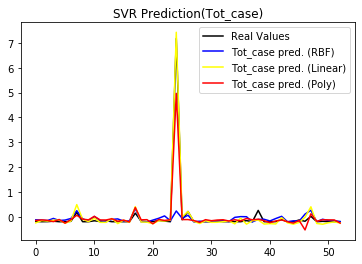

In [44]:
svr_prediction(X_case,Y_case,"Tot_case")

We see the results of the three SVR models we use. While the results are quite good in Linear Kernel and Polynomial Kernel, we see that RBF does not give good results in this data model. The reason why Linear kernel has been so successful shows that there is a direct relationship between the total case and other columns.

Linear R2 value(Tot_case): 0.975841476840208


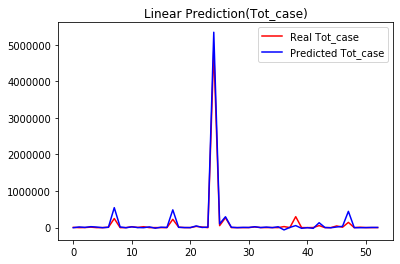

In [45]:
linear_prediction(X_case,Y_case,"Tot_case")

In the previous model, we mentioned that there might be a linear relationship between Total case and other columns.To verify this, we used the linear Regression model directly.
This model also has a very good accuracy rate. So we can say that there is a linear relation between Total case and other features

In [46]:
polyReg_prediction(X_case,Y_case,2,"Tot_case") 

Poly. Reg R2 value: 0.6271960358872187


We see that the second degree polynomal regression also gives an average result. Lets see the results of the degree = 3 and degree = 5:

In [47]:
polyReg_prediction(X_case,Y_case,3,"Tot_case") 
polyReg_prediction(X_case,Y_case,5,"Tot_case") 

Poly. Reg R2 value: 0.11669455902544712
Poly. Reg R2 value: -1.283071236461804


As the polynomal degree increases, the result gets incredibly bad.

As we can see from here, there is a linear connection between the total case column and the other columns.

# Total Death Prediction

In [48]:
covid_data

,location,total_cases,total_deaths,population,population_density,median_age,aged_65_older,aged_70_older,cvd_death_rate,diabetes_prevalence,hospital_beds_per_100k
0,Afghanistan,7653,178,3.892834e+07,54.422,18.6,2.581,1.337,597.029,9.59,0.500
1,Albania,949,31,2.877800e+06,104.871,38.0,13.188,8.643,304.195,10.08,2.890
2,United Arab Emirates,25063,227,9.890400e+06,112.442,34.0,1.144,0.526,317.840,17.26,1.200
3,Argentina,8796,393,4.519578e+07,16.177,31.9,11.198,7.441,191.032,5.50,5.000
4,Armenia,5041,64,2.963234e+06,102.931,35.7,11.232,7.571,341.010,7.11,4.200
...,...,...,...,...,...,...,...,...,...,...,...
153,Yemen,167,28,2.982597e+07,53.508,20.3,2.922,1.583,495.003,5.35,0.700
154,South Africa,17200,312,5.930869e+07,46.754,27.3,5.344,3.053,200.380,5.52,2.320
155,Zambia,772,7,1.838396e+07,22.995,17.7,2.480,1.542,234.499,3.94,2.000
156,Zimbabwe,46,4,1.486293e+07,42.729,19.6,2.822,1.882,307.846,1.82,1.700


In [49]:
x_deaths = covid_data.iloc[:,3:]
x_deaths = pd.concat([x_deaths,  covid_data["total_cases"]], axis=1, sort=False)
y_deaths = covid_data.iloc[:,2:3]

#NumPY dizi (array) dönüşümü
X_deaths = x_deaths.values
Y_deaths = y_deaths.values

SVR(Rbf kernel) R2 value: 0.07112694703453959
SVR(Linear kernel) R2 value: 0.9847276962283387
SVR(Poly kernel) R2 value: 0.470970385329355


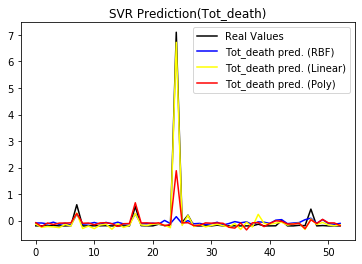

In [50]:
svr_prediction(X_deaths,Y_deaths,"Tot_death")

The situation is almost the same in total death. Linear kernel gives very good results while other kernels give bad results.

Linear R2 value(Tot_death): 0.9747988856118607


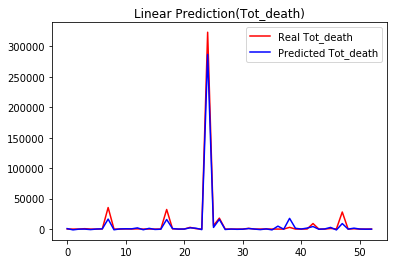

In [51]:
linear_prediction(X_deaths,Y_deaths,"Tot_death")

In [52]:
polyReg_prediction(X_deaths,Y_deaths,2,"Tot_death")

Poly. Reg R2 value: 0.8531232458105882


In [53]:
polyReg_prediction(X_deaths,Y_deaths,3,"Tot_death")


Poly. Reg R2 value: 0.8492785987942582


In [54]:
polyReg_prediction(X_deaths,Y_deaths,5,"Tot_death")

Poly. Reg R2 value: -0.07874071891800827


As the polynomal degree increases, we can see that the results go very badly. This shows that there is a first-order linear connection between them.

# References<a class="anchor" id="references"></a>

All references (For all of the three parts)
References of related datasets are specified in the Data Understanding sections as links

1-) https://scikit-learn.org/stable/

2-) https://pandas.pydata.org/pandas-docs/stable/user_guide/visualization.html

3-) https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset

4-) https://www.kaggle.com/sudalairajkumar/novel-corona-virus-2019-dataset/discussion/128708

5-) https://ourworldindata.org/mortality-risk-covid

6-) https://www.epicentro.iss.it/en/coronavirus/sars-cov-2-analysis-of-deaths

7-) https://www.bilkav.com/makine-ogrenmesi-egitimi/ (Regression notebooks)

8-) https://npgeo-corona-npgeo-de.hub.arcgis.com/

9-) https://medium.com/@stallonejacob/time-series-forecast-a-basic-introduction-using-python-414fcb963000

10-) https://www.kaggle.com/dkjung/covid-19-eda-s-korea-forecasting-global

11-) https://www.kaggle.com/chaudharijay2000/prediction-of-death-and-confirmed-cases-covid-19